## Appendix 1 - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Data

In [2]:
import pandas as pd
titanic_training_data = pd.read_csv('train.csv')

# show first five rows of the data
titanic_training_data.head(100)
# show number of columns and rows
titanic_training_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


(891, 12)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical, or ordinal |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical or indicator |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Cabin | Cabin number | | Categorical |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |

### Exploratory Data Analysis

First, we can categorize each variable as either an indicator variable, multi-category categorical variable, or numeric variable.  Then we can proceed in our exploratory data analysis by constructing the appropriate visualization for each type of variable.

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'Cabin'}>

<AxesSubplot:title={'center':'Sex'}>

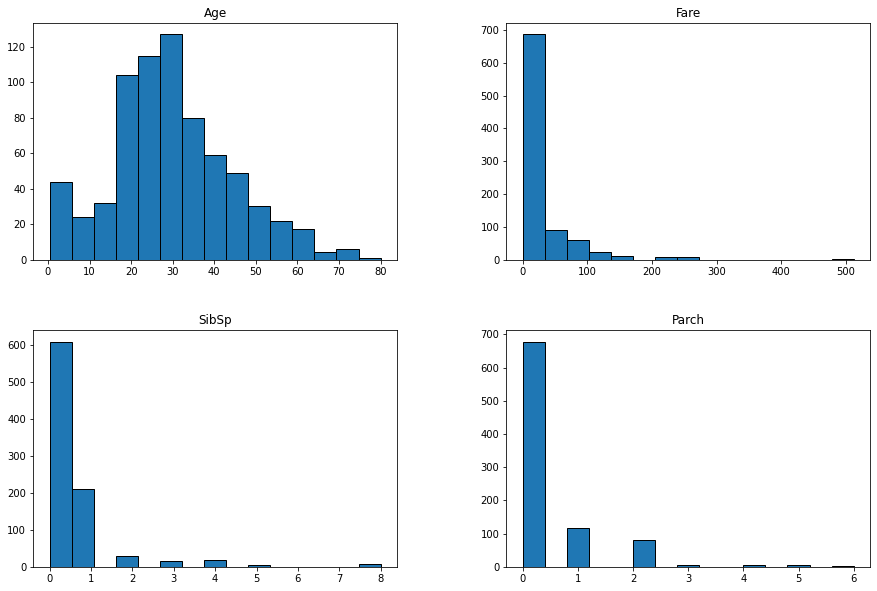

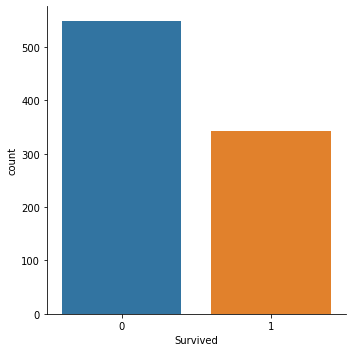

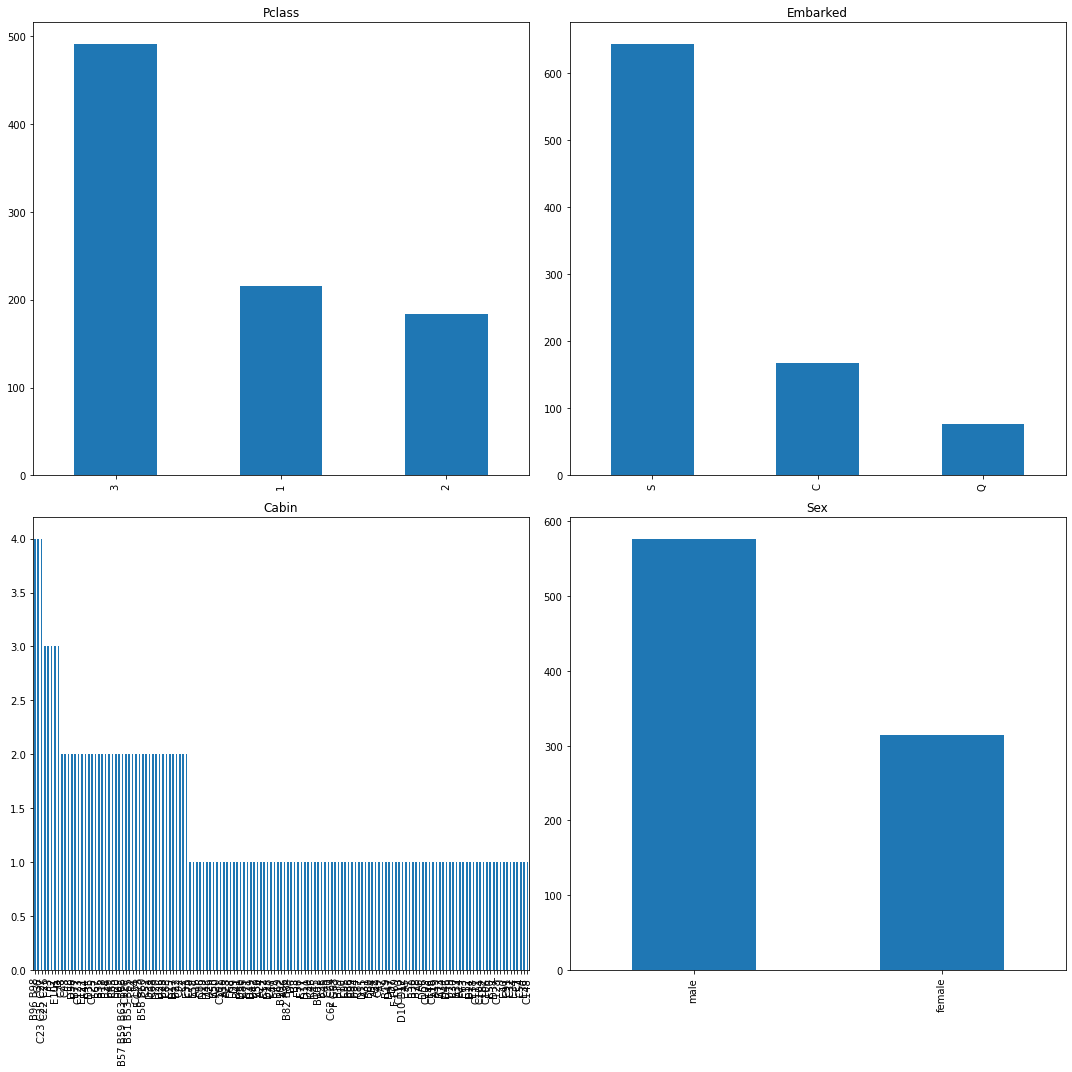

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived']

categorical_variables = ['Pclass', 'Embarked', 'Cabin', 'Sex']

# Numeric Variable Visualizations
titanic_training_data[numeric_variables].describe()

titanic_training_data[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


# Indicator Variable Visualizations
sns.catplot(x = 'Survived', kind = 'count', data = titanic_training_data)


# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()





### Investigation of Missing Data and Outliers

In [4]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data.isnull().sum()
null_percentage = titanic_training_data.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


Let's address the missing data appropriately in a new dataframe that we'll name titanic_training_data_cleaned.

In [5]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_training_data_cleaned = titanic_training_data.copy(deep=True)

# change Null values to the most common value (S) for Embarked 
titanic_training_data_cleaned['Embarked'].fillna('S', inplace=True)

# fill Nulls for Age with median value
titanic_training_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_training_data_cleaned['Cabin_Data_Indicator'] = titanic_training_data_cleaned['Cabin'].notna().astype(int)

titanic_training_data_cleaned['First_Cabin_Deck'] = np.where(titanic_training_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_training_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Create a new variable indicating whether a passenger is a child
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Age'] <= 17
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Child_Indicator'].astype(int)


# Theoretically we could create a new variable for cabin number here if we're interested in that
# Time permitting, maybe I will circle back to work on that some more, but for now I'm moving on to focus on more
# important pieces of this assignment - especially since intuitively I don't think cabin number should make a huge
# difference for survival rates

# There also could be value in creating a variable about marriage status based on whether the names contain "Miss" or "Mrs"
# But we can circle back to that if we have time I think

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_training_data_cleaned.drop(['Cabin'],axis=1,inplace=True)

Check the distributions of the variables in the newly cleaned dataframe.  Also, check for missing values in this new dataframe.

In [6]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None,1


(891, 14)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |
| Cabin Data Indicator | Cabin number | | Indicator, dichotomuous |
| First cabin deck | In first cabin class | | Categorical |
| Child_indicator | Was a child, under 18 years old | | Indicator, dichotomuous |

In [7]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.523008,0.381594
std,13.019697,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'First_Cabin_Deck'}>

<AxesSubplot:title={'center':'Sex'}>

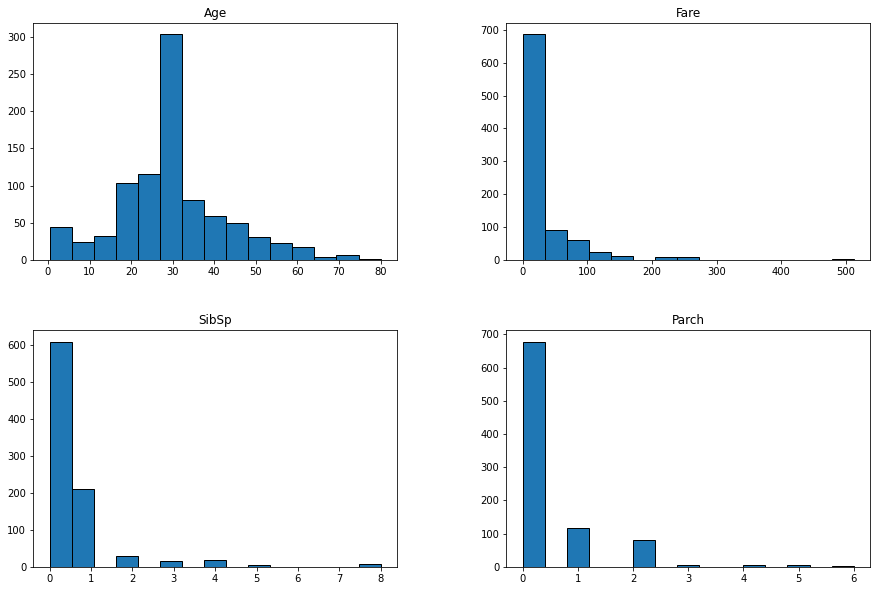

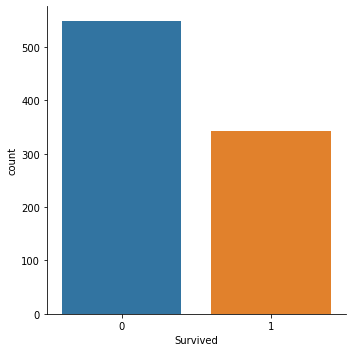

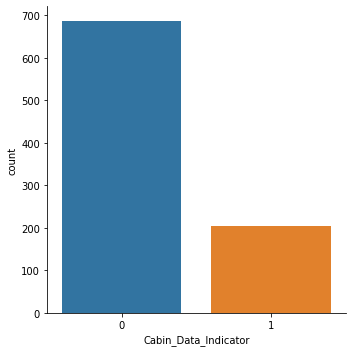

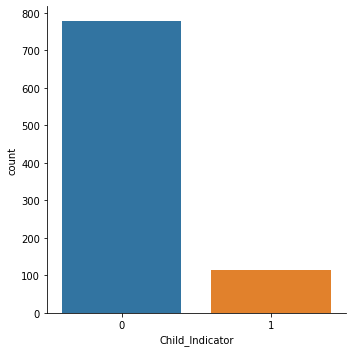

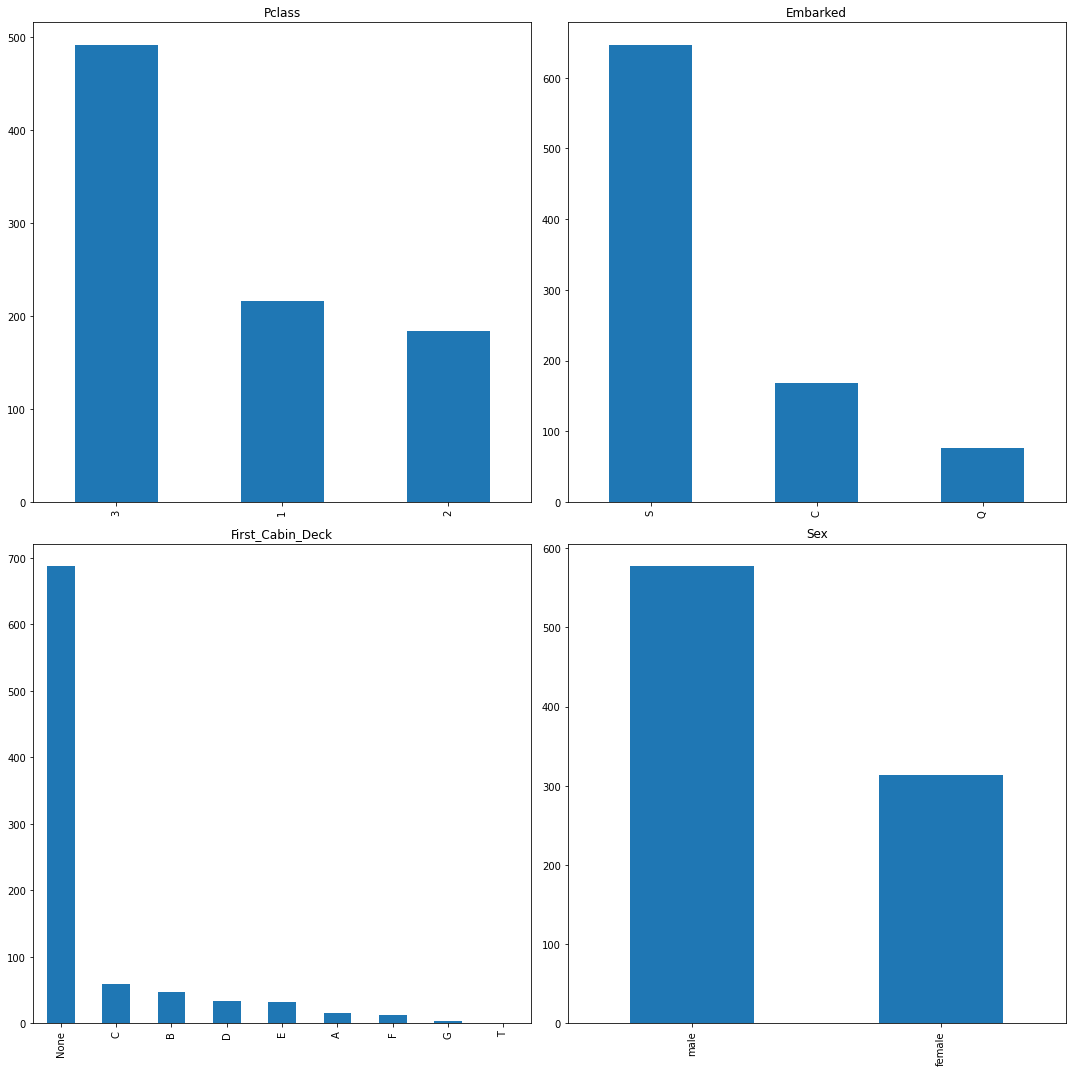

In [8]:
# Update our definitions of the indicator, numeric, and categorical variables to reflect our newly created variables
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived', 'Cabin_Data_Indicator', 'Child_Indicator']

categorical_variables = ['Pclass', 'Embarked', 'First_Cabin_Deck', 'Sex']

# Numeric Variable Visualizations
titanic_training_data_cleaned[numeric_variables].describe()

titanic_training_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_training_data_cleaned)

fig.tight_layout()

    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()


### Examination of the Relationship between the Dependent Variable and Potential Predictors

Let's create some visualizations to examine the relationship between potential predictors and our dependent variable.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



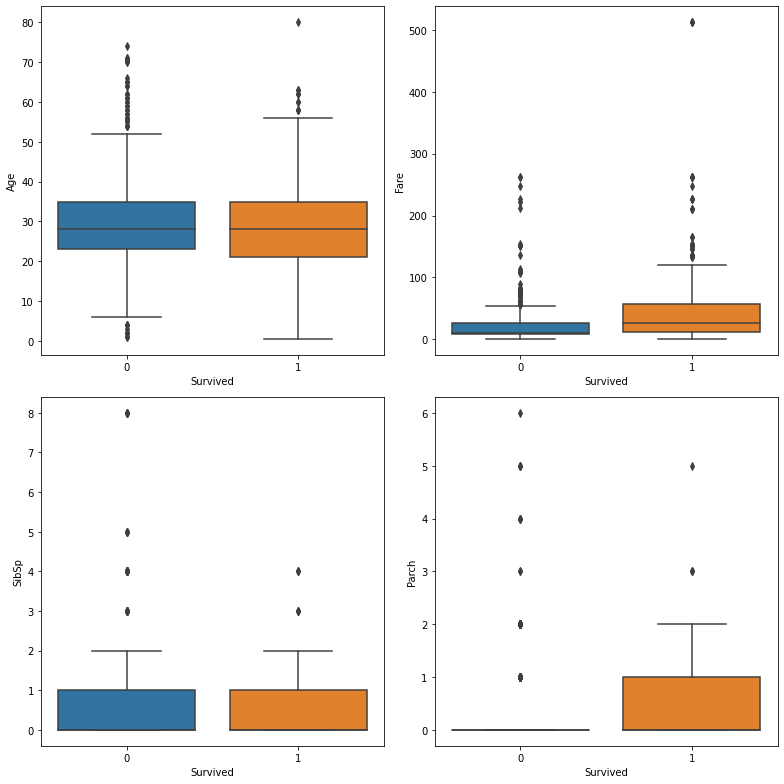

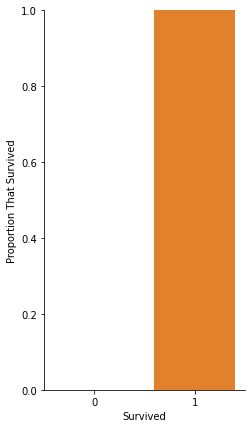

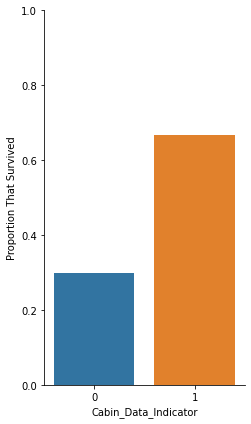

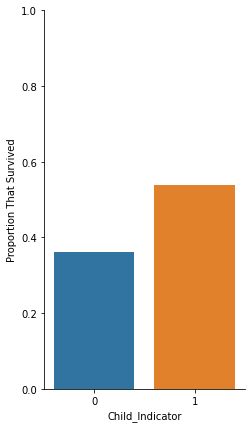

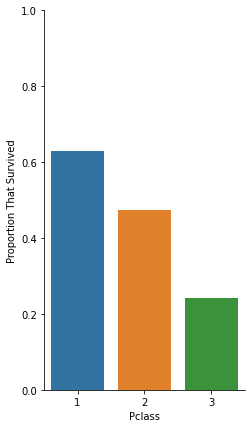

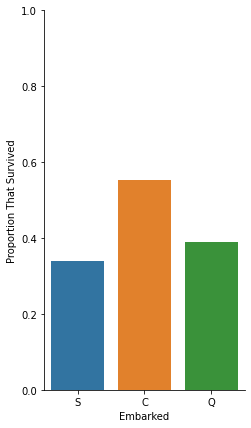

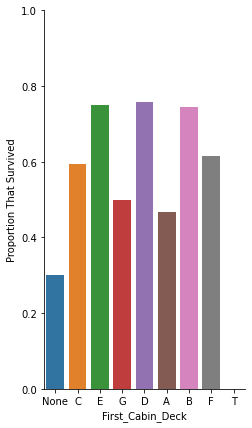

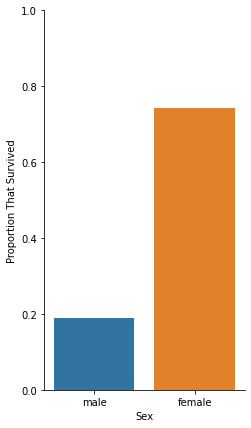

In [9]:
# Numeric Variable Visualizations

fig, ax = plt.subplots(2, 2, figsize=(11, 11))

for var, subplot in zip(numeric_variables, ax.flatten()):
         sns.boxplot(x = 'Survived', y = var, data=titanic_training_data_cleaned, ax=subplot)

fig.tight_layout()

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()



# Categorical Variable Visualizations
for var, subplot in zip(categorical_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()




### Logistic Regression

### LDA or QDA Model

In [10]:
# LDA, or Linear Discriminant Analyiss
# A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
# The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
# The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions,.

In [42]:
# Encode Embarked, Sex, and First Cabin Deck
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Embarked
le.fit(np.array(titanic_training_data_cleaned['Embarked']).reshape(-1,1))
titanic_training_data_cleaned['encoded_Embarked'] = le.transform(titanic_training_data_cleaned['Embarked'])

# Cabin Deck
le.fit(np.array(titanic_training_data_cleaned['First_Cabin_Deck']).reshape(-1,1))
titanic_training_data_cleaned['encoded_FirstCabinDeck'] = le.transform(titanic_training_data_cleaned['First_Cabin_Deck'])

# Sex
le.fit(np.array(titanic_training_data_cleaned['Sex']).reshape(-1,1))
titanic_training_data_cleaned['encoded_Sex'] = le.transform(titanic_training_data_cleaned['Sex'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

LabelEncoder()

LabelEncoder()

In [100]:
Survived = titanic_training_data_cleaned['Survived'].to_list()
LDA_data = titanic_training_data_cleaned.drop(columns=['Sex','PassengerId', 'Survived','Name','Ticket','Embarked','First_Cabin_Deck'])

In [101]:
LDA_data.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin_Data_Indicator,Child_Indicator,encoded_Embarked,encoded_FirstCabinDeck,encoded_Sex
0,3,22.0,1,0,7.2500,0,0,2,7,1
1,1,38.0,1,0,71.2833,1,0,0,2,0
2,3,26.0,0,0,7.9250,0,0,2,7,0
3,1,35.0,1,0,53.1000,1,0,2,2,0
4,3,35.0,0,0,8.0500,0,0,2,7,1
5,3,28.0,0,0,8.4583,0,0,1,7,1
6,1,54.0,0,0,51.8625,1,0,2,4,1
7,3,2.0,3,1,21.0750,0,1,2,7,1
8,3,27.0,0,2,11.1333,0,0,2,7,0
9,2,14.0,1,0,30.0708,0,1,0,7,0


In [102]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(LDA_data)
y = Survived
lda = LinearDiscriminantAnalysis(solver = 'svd')
lda.fit(X, y)
predictions = lda.predict(X)

LinearDiscriminantAnalysis()

In [96]:
# Basic stats for LDA result

print('Coefficients:',lda.coef_)
print('Means:',lda.means_)
print('Score:',lda.score(X,y))

Coefficients: [[-0.78329404 -0.36051855 -0.36472279 -0.16055129  0.11776498  0.5961244
   0.3043902  -0.18201227  0.31828486 -1.71008515]]
Means: [[ 0.26715372  0.051232    0.02787907 -0.06442783 -0.20308492 -0.2501295
  -0.09647984  0.13234149  0.23292455  0.42885221]
 [-0.42885202 -0.08224084 -0.04475325  0.10342363  0.32600474  0.40152367
   0.15487553 -0.21244291 -0.3739052  -0.68842066]]
Score: 0.8103254769921436


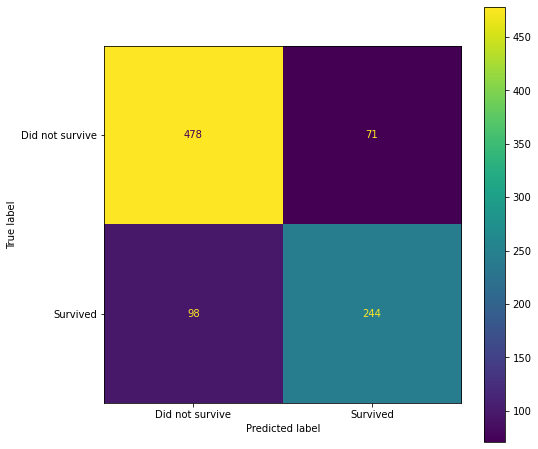

In [97]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()

Text(0.5, 1.0, 'LDA ROC Curve')

Text(0.5, 1.0, 'LDA Precision-Recall Curve')

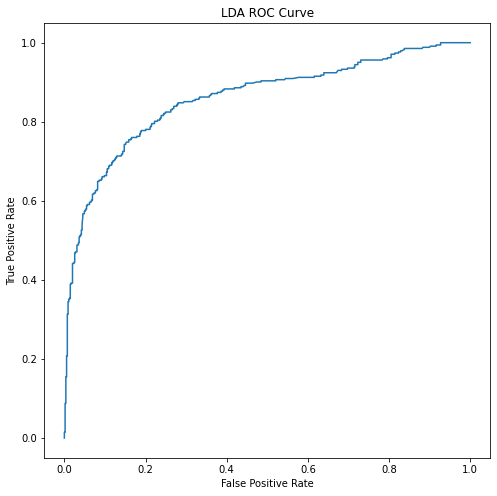

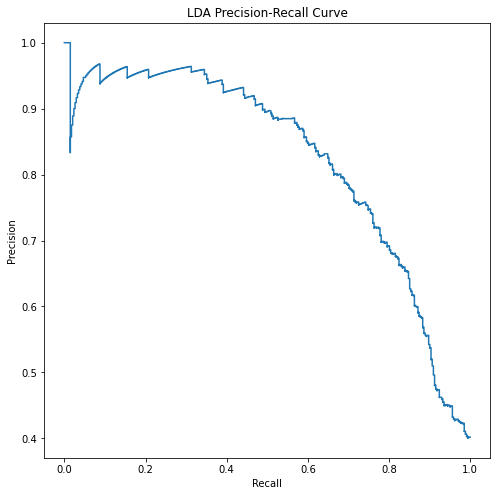

In [143]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

probabilities = lda.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(np.array(Survived), probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('LDA ROC Curve')

prec, recall, _ = precision_recall_curve(Survived, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('LDA Precision-Recall Curve')

LinearDiscriminantAnalysis()

Coefficients: [[-0.88251084 -0.3082268  -0.46942416 -0.07578021  0.04179451  0.89716768
   0.45797592 -0.1785224   0.55638909 -1.75826474]]
Means: [[ 0.26817722  0.07412956 -0.01165916 -0.09820032 -0.20109511 -0.26017979
  -0.10977473  0.13223753  0.2342172   0.43055639]
 [-0.46723966 -0.04752283 -0.04954646  0.12621283  0.31770745  0.44602103
   0.17744641 -0.21763695 -0.39950306 -0.69413177]]
Score: 0.8146067415730337


Text(0.5, 1.0, 'LDA ROC Curve')

Text(0.5, 1.0, 'LDA Precision-Recall Curve')

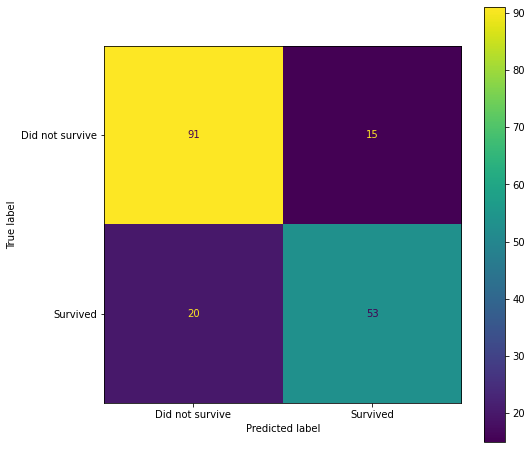

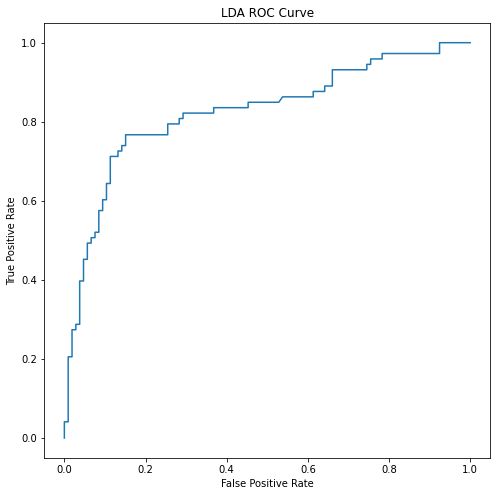

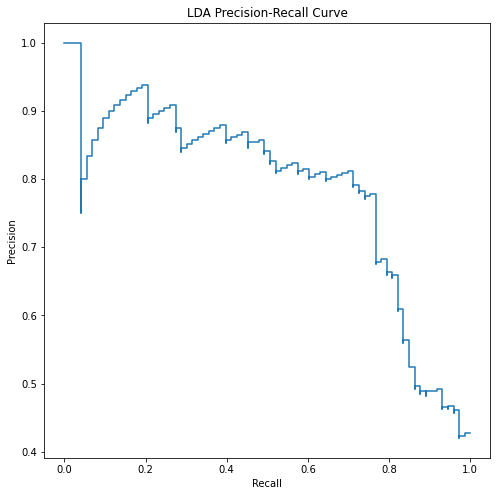

In [151]:
# Validation

X_train_lda, X_validation_lda, y_train_lda, y_validation_lda = train_test_split(X,y,test_size=0.2,random_state=1)
lda.fit(X_train_lda, y_train_lda)

# Basic stats for LDA result
print('Coefficients:',lda.coef_)
print('Means:',lda.means_)
print('Score:',lda.score(X_train_lda,y_train_lda))

# Predictions
predictions = lda.predict(X_validation_lda)
probabilities = lda.predict_proba(X_validation_lda)[:,1]

# Confusion
cm = confusion_matrix(y_validation_lda, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()

# Curves
fpr, tpr, _ = roc_curve(y_validation_lda, probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('LDA ROC Curve')

prec, recall, _ = precision_recall_curve(y_validation_lda, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('LDA Precision-Recall Curve')


### Create K-Nearest Neighbors Model

Make modifications to the training dataset that are specifically needed for a K-Nearest Neighbors model

In [12]:
# Create a new training dataframe specifically for the KNN model so that we don't interfere with the training dataset
# used for other models
knn_training_validation_df = titanic_training_data_cleaned.copy(deep=True)

# dummy encode the Sex and PClass variables
knn_training_validation_df = pd.get_dummies(knn_training_validation_df, columns=['Sex'], drop_first=True)

# Apply Min-Max Scaling to the Fare variable
import os
from sklearn.preprocessing import MinMaxScaler
 
min_max_scaler = MinMaxScaler()
 
knn_training_validation_df[['min_max_scaled_fare']] = min_max_scaler.fit_transform(knn_training_validation_df[['Fare']])
knn_training_validation_df[['min_max_scaled_Pclass']] = min_max_scaler.fit_transform(knn_training_validation_df[['Pclass']])

# show first five rows of the data
knn_training_validation_df.head(10)

# Check that min-max scaling applied to the fare variable correctly
knn_training_validation_df['min_max_scaled_fare'].describe()
knn_training_validation_df['min_max_scaled_Pclass'].describe()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator,Sex_male,min_max_scaled_fare,min_max_scaled_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,None,0,1,0.014151,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,C,0,0,0.139136,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0,0,0.015469,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,C,0,0,0.103644,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,None,0,1,0.015713,1.0
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,Q,0,None,0,1,0.016510,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,1,E,0,1,0.101229,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,S,0,None,1,1,0.041136,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,S,0,None,0,0,0.021731,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,C,0,None,1,0,0.058694,0.5


count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: min_max_scaled_fare, dtype: float64

count    891.000000
mean       0.654321
std        0.418036
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        1.000000
Name: min_max_scaled_Pclass, dtype: float64

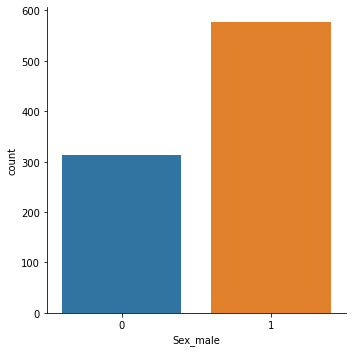

In [13]:
# Create visualizations for the distributions for each of our new variables

# New Indicator Variable Visualizations - Sex_male
sns.catplot(x = 'Sex_male', kind = 'count', data = knn_training_validation_df)


<AxesSubplot:>

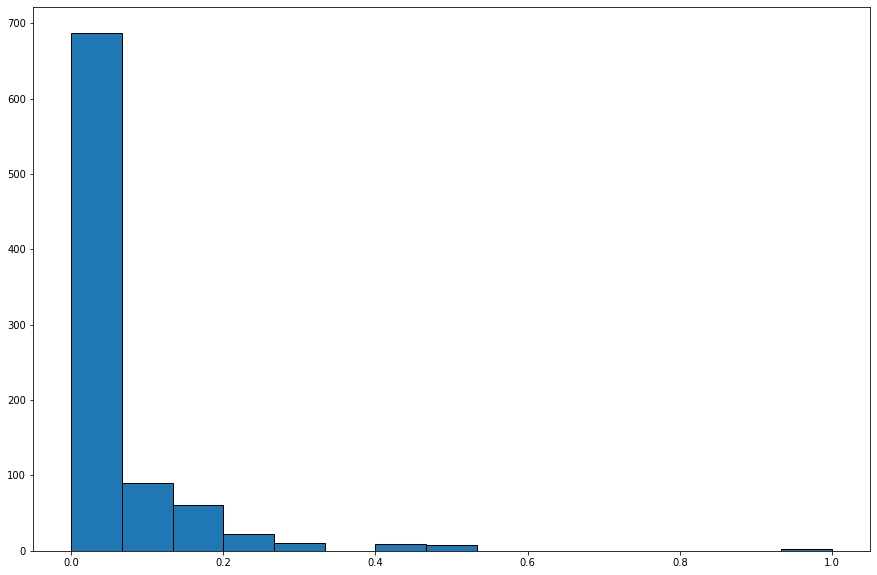

In [14]:
# New Numeric Variable Visualizations - Min_Max_Scaled_Fare
knn_training_validation_df['min_max_scaled_fare'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)


<AxesSubplot:>

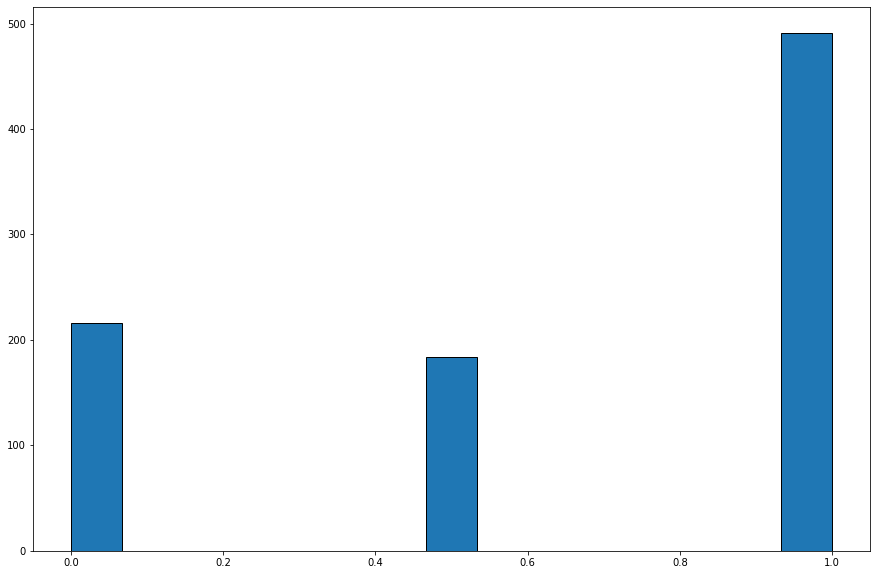

In [15]:
# New Numeric Variable Visualizations - Min_Max_Scaled_Pclass
knn_training_validation_df['min_max_scaled_Pclass'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)

Split the KNN training/validation dataframe into two training and validation dataframes (which will better enable us to tune hyperparameters later).

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split Kaggle's Training dataframe into training and validation dataframes
knn_training_validation_x = knn_training_validation_df.drop(columns=['PassengerId', 
                                                                     'Survived',
                                                                    'Pclass',
                                                                    'Name',
                                                                    'Age',
                                                                    'SibSp',
                                                                    'Parch',
                                                                    'Ticket',
                                                                    'Fare',
                                                                    'Embarked',
                                                                    'First_Cabin_Deck'])
knn_training_validation_y = knn_training_validation_df['Survived']

X_train_knn, X_validation_knn, y_train_knn, y_validation_knn = train_test_split(knn_training_validation_x,
                                                                                knn_training_validation_y,
                                                                                test_size=0.2, 
                                                                                random_state=1)

# Fit a K-Nearest Neighbors Model to the Training Dataframe 
# Use the validation dataframe to tune the hyperparameters in such a way that we find the best values for K and for 
# model weights.

parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],
 }

gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train_knn, y_train_knn)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

knn_optimal_weights_method = gridsearch.best_params_["weights"]

knn_optimal_k = gridsearch.best_params_["n_neighbors"]

print(f"The optimal value of k is {knn_optimal_k}.")

print(f"The optimal way of assigning weights in the knn model is via the {knn_optimal_weights_method} method.")




GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

The optimal value of k is 16.
The optimal way of assigning weights in the knn model is via the uniform method.


In [17]:
{'n_neighbors': knn_optimal_k, 'weights': knn_optimal_weights_method}
validation_preds_grid = gridsearch.predict(X_validation_knn)
validation_mse = mean_squared_error(y_validation_knn, validation_preds_grid)
validation_rmse = sqrt(validation_mse)

print(f"After applying the optimal KNN model to the validation dataset, the root mean squared error of the predictions is {validation_rmse:.4f}.")


{'n_neighbors': 16, 'weights': 'uniform'}

After applying the optimal KNN model to the validation dataset, the root mean squared error of the predictions is 0.4031.


Create a Receiving Operating Characteristic (ROC) Curve using the data from the validation dataset

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'Sensitivity')

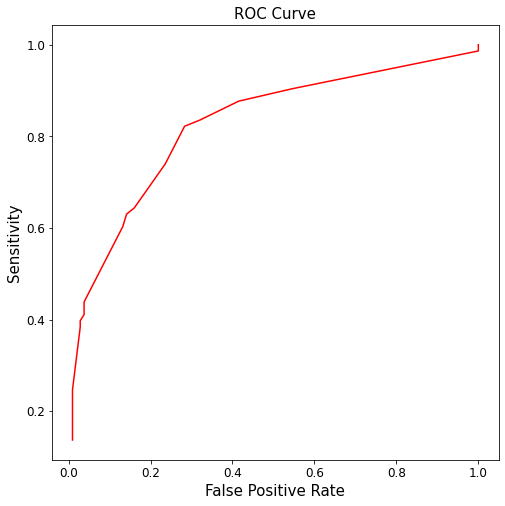

In [18]:
from matplotlib import rcParams

validation_df_knn = X_validation_knn.join(y_validation_knn)
validation_df_knn['knn_prediction'] = validation_preds_grid.tolist()

rcParams['figure.figsize'] = 8, 8

Survived = validation_df_knn[validation_df_knn["Survived"].isin([1])]
Died = validation_df_knn[validation_df_knn["Survived"].isin([0])]

Survived_Count = Survived.shape[0]
Died_Count = Died.shape[0]

Prediction_Cutoff = np.arange(0, 1, 0.01).tolist()
Cutoff_df = pd.DataFrame(Prediction_Cutoff, columns=['Prediction_Cutoff'])

Sensitivity_List = []
False_Positive_List = []
Precision_List = []


for pc in Cutoff_df['Prediction_Cutoff']:
    true_positive_count = (Survived['knn_prediction'] >= pc).sum()
    Sensitivity_List.append(true_positive_count / Survived_Count)
    false_positive_count = (Died['knn_prediction'] >= pc).sum()
    False_Positive_List.append(false_positive_count / Died_Count)
    Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))     

Cutoff_df['Sensitivity'] = Sensitivity_List
Cutoff_df['False Positive Rate'] = False_Positive_List
Cutoff_df['Precision'] = Precision_List

fig, ax = plt.subplots()
ax.plot(Cutoff_df['False Positive Rate'], Cutoff_df['Sensitivity'], 'red')
ax.set_title('ROC Curve', fontsize = 15)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('Sensitivity', fontsize = 15)

plt.tick_params(axis='both', which='major', labelsize=12)

Create a Precision - Recall Curve using the data from the validation dataset

Text(0.5, 1.0, 'Precision - Recall Curve')

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

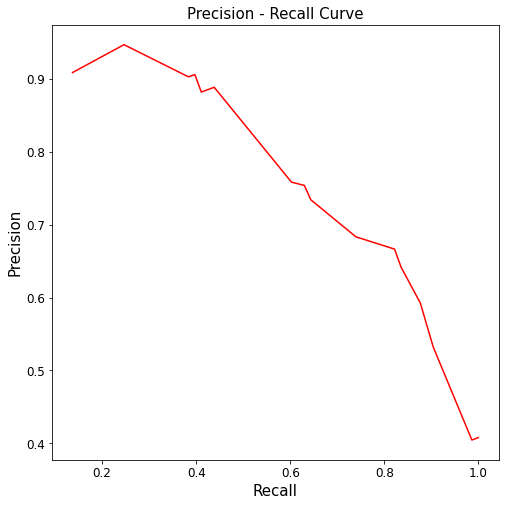

In [19]:
fig, ax = plt.subplots()
ax.plot(Cutoff_df['Sensitivity'], Cutoff_df['Precision'], 'red')
ax.set_title('Precision - Recall Curve', fontsize = 15)
ax.set_xlabel('Recall', fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)

plt.tick_params(axis='both', which='major', labelsize=12)

Find the cutoff value that maximizes the percent of the validation dataset assigned accurate predictions

In [20]:
Cutoff_df['Specificity'] = 1 - Cutoff_df['False Positive Rate'] 
Cutoff_df['Percent_Correctly_Predicted_In_Validation_DF'] = ( ( Survived.shape[0] * Cutoff_df['Specificity'] ) + (Died.shape[0] * Cutoff_df['Sensitivity']) ) / (Survived.shape[0] + Died.shape[0] )

KNN_Cutoff_Shortlist_df = Cutoff_df[Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF == Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF.max()]

Optimal_KNN_Cutoff = KNN_Cutoff_Shortlist_df['Prediction_Cutoff'].median()

print(f"The optimal cutoff boundary for predicting survivals for this model is {Optimal_KNN_Cutoff:.4f}.")

The optimal cutoff boundary for predicting survivals for this model is 0.2850.


### Import and Clean Testing Dataset

Import the Titanic Testing Dataset

In [21]:
import pandas as pd
titanic_testing_data = pd.read_csv('test.csv')

# show first five rows of the data
titanic_testing_data.head(100)
# show number of columns and rows
titanic_testing_data.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


(418, 11)

Check the testing dataset for missing values

In [22]:
# find null counts, percentage of null values, and column type
null_count = titanic_testing_data.isnull().sum()
null_percentage = titanic_testing_data.isnull().sum() * 100 / len(titanic_testing_data)
column_type = titanic_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,327,78.229665,object
Age,86,20.574163,float64
Fare,1,0.239234,float64


Appropriately address the missing values in the testing dataframe.  Add the newly created variables as well to the testing dataframe.

In [23]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_testing_data_cleaned = titanic_testing_data.copy(deep=True)

# change Null for Fare with the median value from the Training dataset
titanic_testing_data_cleaned['Fare'].fillna(titanic_training_data_cleaned['Fare'].median(), inplace=True)

# fill Nulls for Age with median value from the Training dataset
titanic_testing_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_testing_data_cleaned['Cabin_Data_Indicator'] = titanic_testing_data_cleaned['Cabin'].notna().astype(int)

titanic_testing_data_cleaned['First_Cabin_Deck'] = np.where(titanic_testing_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_testing_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Create a new variable indicating whether a passenger is a child
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Age'] <= 17
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Child_Indicator'].astype(int)

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_testing_data_cleaned.drop(['Cabin'],axis=1,inplace=True)



Examine whether the desired modifications to the testing dataframe applied correctly.

In [24]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None,1


(891, 14)

In [25]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


Conduct exploratory data analysis on the variables in the testing dataframe to confirm that all the values appear to be reasonable (to proactively address data value errors if needed).

,Age,Fare,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,29.805024,35.576535,0.447368,0.392344
std,12.667969,55.850103,0.896760,0.981429
min,0.170000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.750000,31.471875,1.000000,0.000000
max,76.000000,512.329200,8.000000,9.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'First_Cabin_Deck'}>

<AxesSubplot:title={'center':'Sex'}>

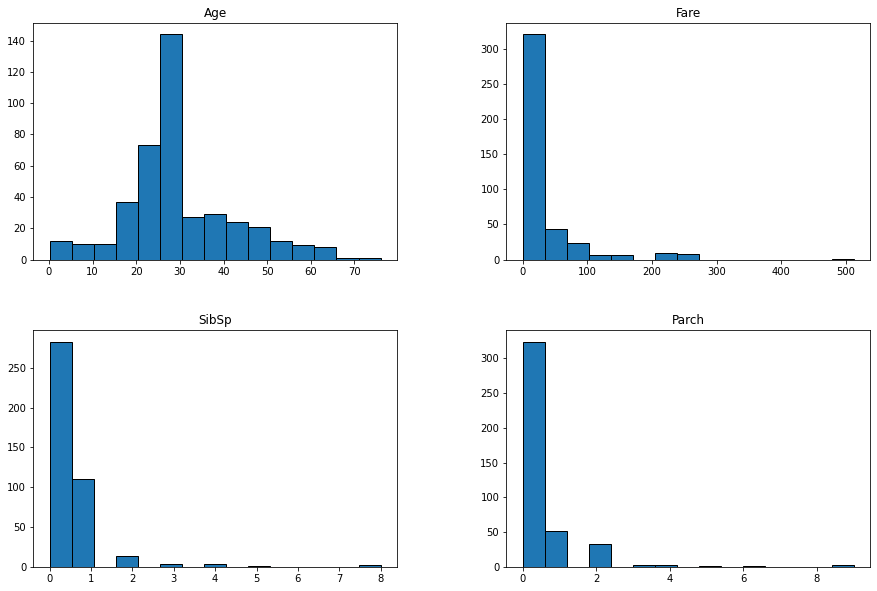

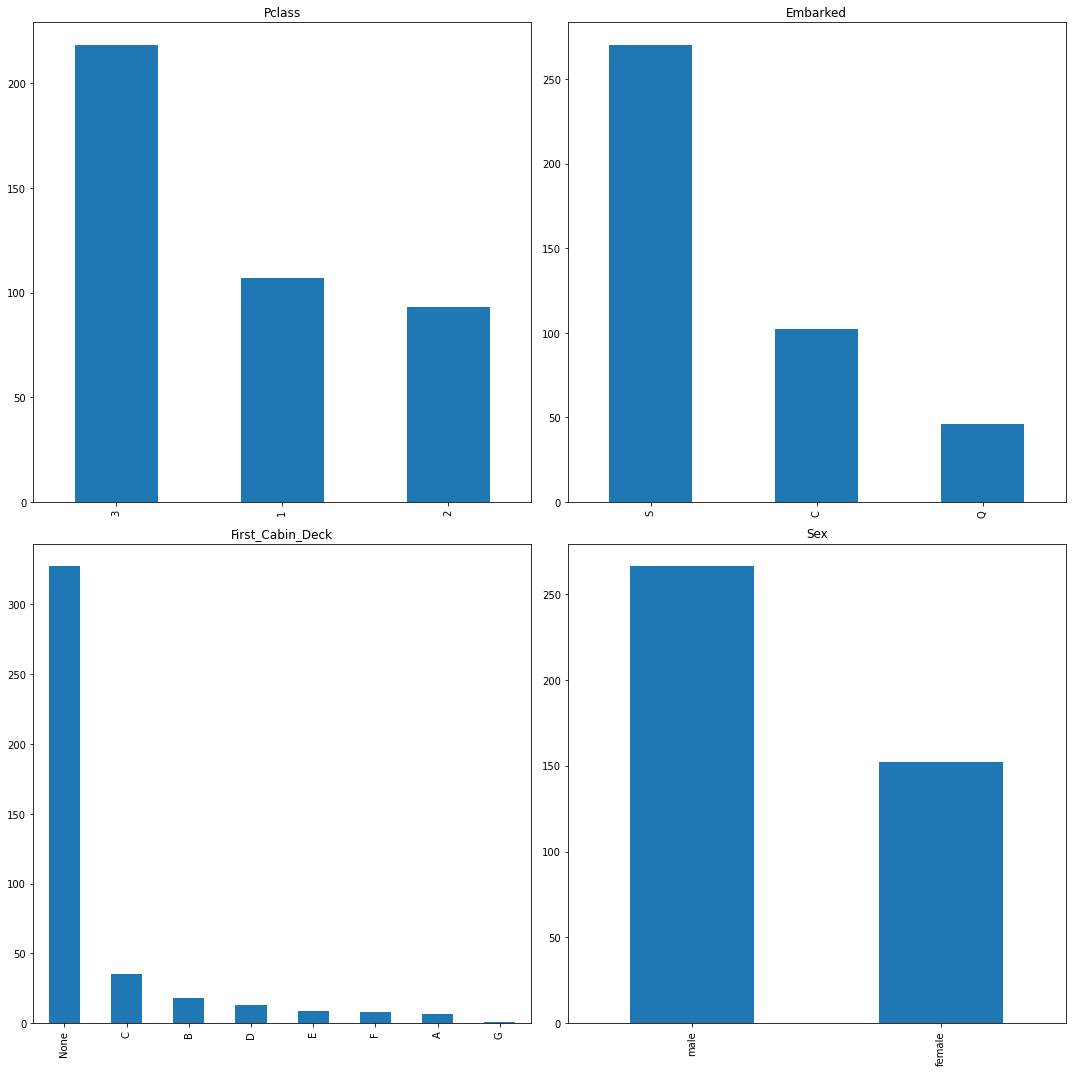

In [26]:
# Numeric Variable Visualizations
titanic_testing_data_cleaned[numeric_variables].describe()

titanic_testing_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_testing_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()

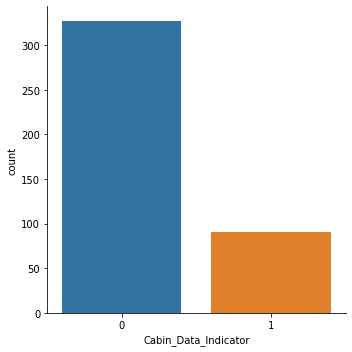

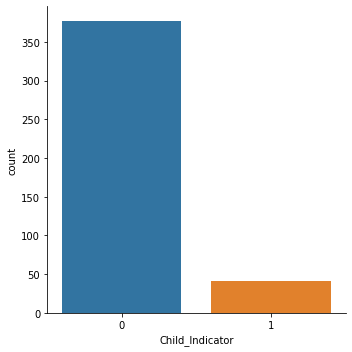

In [27]:
# Indicator Variable Visualizations
indicator_predictors = ['Cabin_Data_Indicator', 'Child_Indicator']


for var, subplot in zip(indicator_predictors, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_testing_data_cleaned)

fig.tight_layout()

### Apply K-Nearest Neighbors Model to the Testing Dataset

Adjust the testing dataset to reflect the modifications made to the KNN training dataset

In [28]:
# Create a new training dataframe specifically for the KNN model so that we don't interfere with the training dataset
# used for other models
knn_testing_df = titanic_testing_data_cleaned.copy(deep=True)

# dummy encode the Sex and PClass variables
knn_testing_df = pd.get_dummies(knn_testing_df, columns=['Sex'], drop_first=True)

# Apply Min-Max Scaling to the Fare variable

min_max_scaler = MinMaxScaler()
 
knn_testing_df[['min_max_scaled_fare']] = min_max_scaler.fit_transform(knn_testing_df[['Fare']])
knn_testing_df[['min_max_scaled_Pclass']] = min_max_scaler.fit_transform(knn_testing_df[['Pclass']])


# show first five rows of the data
knn_testing_df.head(10)

# Check that min-max scaling applied to the fare variable correctly
knn_testing_df['min_max_scaled_fare'].describe()
knn_testing_df['min_max_scaled_Pclass'].describe()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator,Sex_male,min_max_scaled_fare,min_max_scaled_Pclass
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0,None,0,1,0.015282,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,0,None,0,0,0.013663,1.0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0,None,0,1,0.018909,0.5
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0,None,0,1,0.016908,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,0,None,0,0,0.023984,1.0
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,S,0,None,1,1,0.018006,1.0
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,Q,0,None,0,0,0.014891,1.0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,S,0,None,0,1,0.056604,0.5
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,C,0,None,0,0,0.014110,1.0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,S,0,None,0,1,0.047138,1.0


count    418.000000
mean       0.069441
std        0.109012
min        0.000000
25%        0.015412
50%        0.028213
75%        0.061429
max        1.000000
Name: min_max_scaled_fare, dtype: float64

count    418.000000
mean       0.632775
std        0.420919
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: min_max_scaled_Pclass, dtype: float64

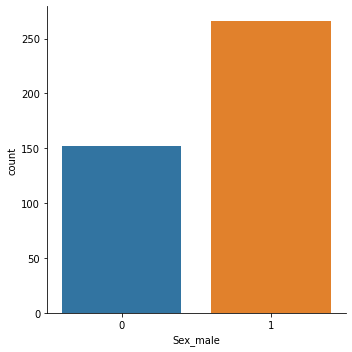

In [29]:
# Create visualizations for the distributions for each of our new variables

# New Indicator Variable Visualizations
sns.catplot(x = 'Sex_male', kind = 'count', data = knn_testing_df)



<AxesSubplot:>

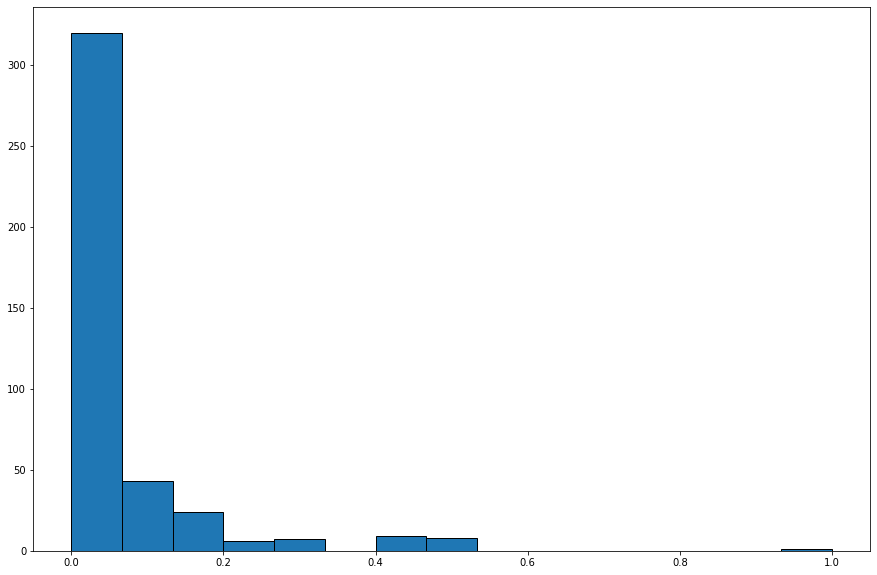

In [30]:
# New Numeric Variable Visualizations - min_max_scaled_fare
knn_testing_df['min_max_scaled_fare'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)



<AxesSubplot:>

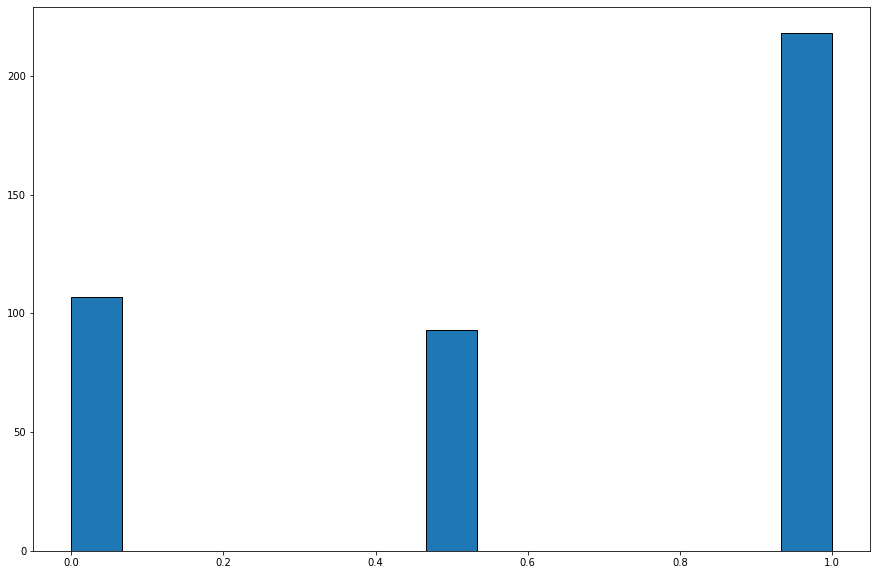

In [31]:
# New Numeric Variable Visualizations - min_max_scaled_pclass
knn_testing_df['min_max_scaled_Pclass'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)

Apply the K Nearest Neighbors Model to the Testing Dataset

In [32]:
# Apply the K - Nearest Model to Elicit Predictions For Testing Dataset
knn_testing_x = knn_testing_df.drop(columns=['PassengerId', 
                                            'Pclass',
                                            'Name',
                                            'Age',
                                            'SibSp',
                                            'Parch',
                                            'Ticket',
                                            'Fare',
                                            'Embarked',
                                            'First_Cabin_Deck'])

knn_testing_preds_grid = gridsearch.predict(knn_testing_x)

# Put the KNN predictions into a Pandas dataframe
prediction_df_knn = pd.DataFrame(knn_testing_preds_grid, columns=['KNN_Prediction'])


# Add the PassengerId column to the front of the KNN predictions dataframe
prediction_df_knn.insert(0, 'PassengerId', knn_testing_df['PassengerId'])

# Use the Optimal Cutoff Boundary Determined Earlier to Turn Predictions into zeros and ones
prediction_df_knn['Survived'] = np.where(prediction_df_knn['KNN_Prediction'] >= Optimal_KNN_Cutoff, 1, 0)

# Drop the KNN_Prediction Column
prediction_df_knn.drop(['KNN_Prediction'],axis=1,inplace=True)

#output predictions to csv
prediction_df_knn.to_csv('test_predictions_knn_v1.csv', index=False)



Display the kaggle results associated with the K-Nearest Neighbors Model

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1494.5, 337.5, -0.5)

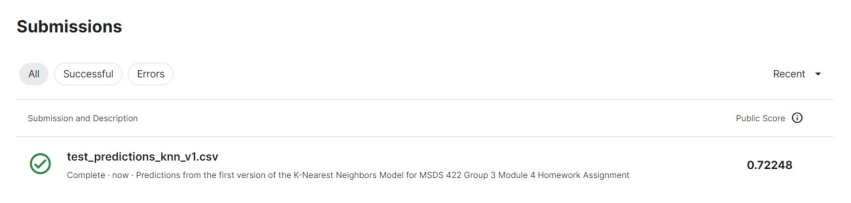

In [33]:
# Display the kaggle results associated with the Lasso Regression Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_KNN_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()